# 🚀 Exécution interactive du pipeline DCASE 2024 – Autoencoder

Ce notebook permet de lancer automatiquement l’ensemble du pipeline :

- Extraction des features
- Entraînement de l’autoencodeur
- Inférence sur les fichiers de test
- Calcul de l’erreur de reconstruction
- Détection des anomalies
- Génération des fichiers CSV (challenge, rapport, soumission)

📦 Le tout en appelant `run_pipeline.py`


In [4]:
# 📌 Librairies standards
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Configuration globale
import warnings
warnings.filterwarnings('ignore')

# 📂 Ajout dynamique du répertoire principal au PYTHONPATH
project_root = Path.cwd().parent  # DCASE2024_ASD_Project/
sys.path.append(str(project_root))

from src import config

## 🔁 Lancer le pipeline complet automatiquement


In [ ]:
# Exécuter le pipeline via subprocess
pipeline_script = Path("../run_pipeline.py")  # adapte si besoin

if pipeline_script.exists():
    exit_code = os.system(f"python {pipeline_script}")
    if exit_code == 0:
        print("✅ Pipeline exécuté avec succès.")
    else:
        print("❌ Erreur lors de l'exécution du pipeline.")
else:
    print("⚠️ Fichier run_pipeline.py non trouvé.")


## 📊 Visualiser les prédictions et le rapport final


In [2]:
# 📄 Lire le CSV des prédictions
df_pred = pd.read_csv(config.PREDICTIONS_DIR / "challenge_predictions.csv")
df_report = pd.read_csv(config.PREDICTIONS_DIR / "report_by_machine.csv")

display(df_report)


,machine_type,n_files,mean_error,std_error,anomaly_rate,score_global
0,ToyCar,6459,0.292641,0.056728,0.99,0.2732
1,ToyConveyor,6509,0.304886,0.059652,1.72,0.2881
2,fan,5550,0.450598,3.591432,7.91,0.4526
3,pump,4205,0.447102,2.562183,16.31,0.4914
4,slider,4094,0.545393,11.711953,5.11,0.5256
5,valve,4170,0.340811,1.388621,2.52,0.3250


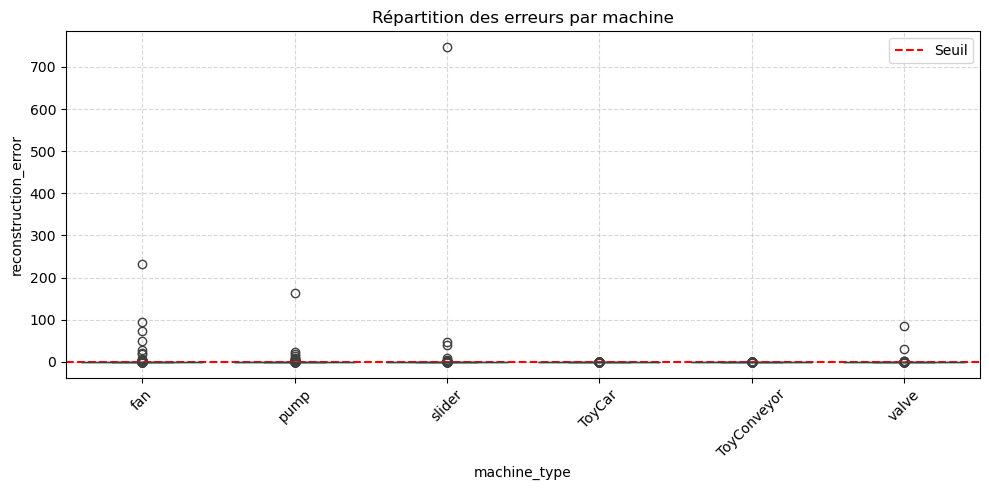

In [5]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_pred, x="machine_type", y="reconstruction_error")
plt.axhline(y=np.load(config.THRESHOLD_PATH), color="red", linestyle="--", label="Seuil")
plt.title("Répartition des erreurs par machine")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
